# EDA


## TOC:
* [Basic EDA](#basic_eda)
* [Comparison EDA](#comp_eda)
    * [Life Expectancy](#Life-Expectancy)
    * [CMPN conditions](#CMPN-conditions)
    * [Social conditions](#social-conditions)
* [Correlation](#correlation)


Importing our cleaned data from previous part:

In [73]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt

data = pd.read_csv('Life_expec_cleaned.csv')


For start, we want to examine outliers and range of values in our variables.

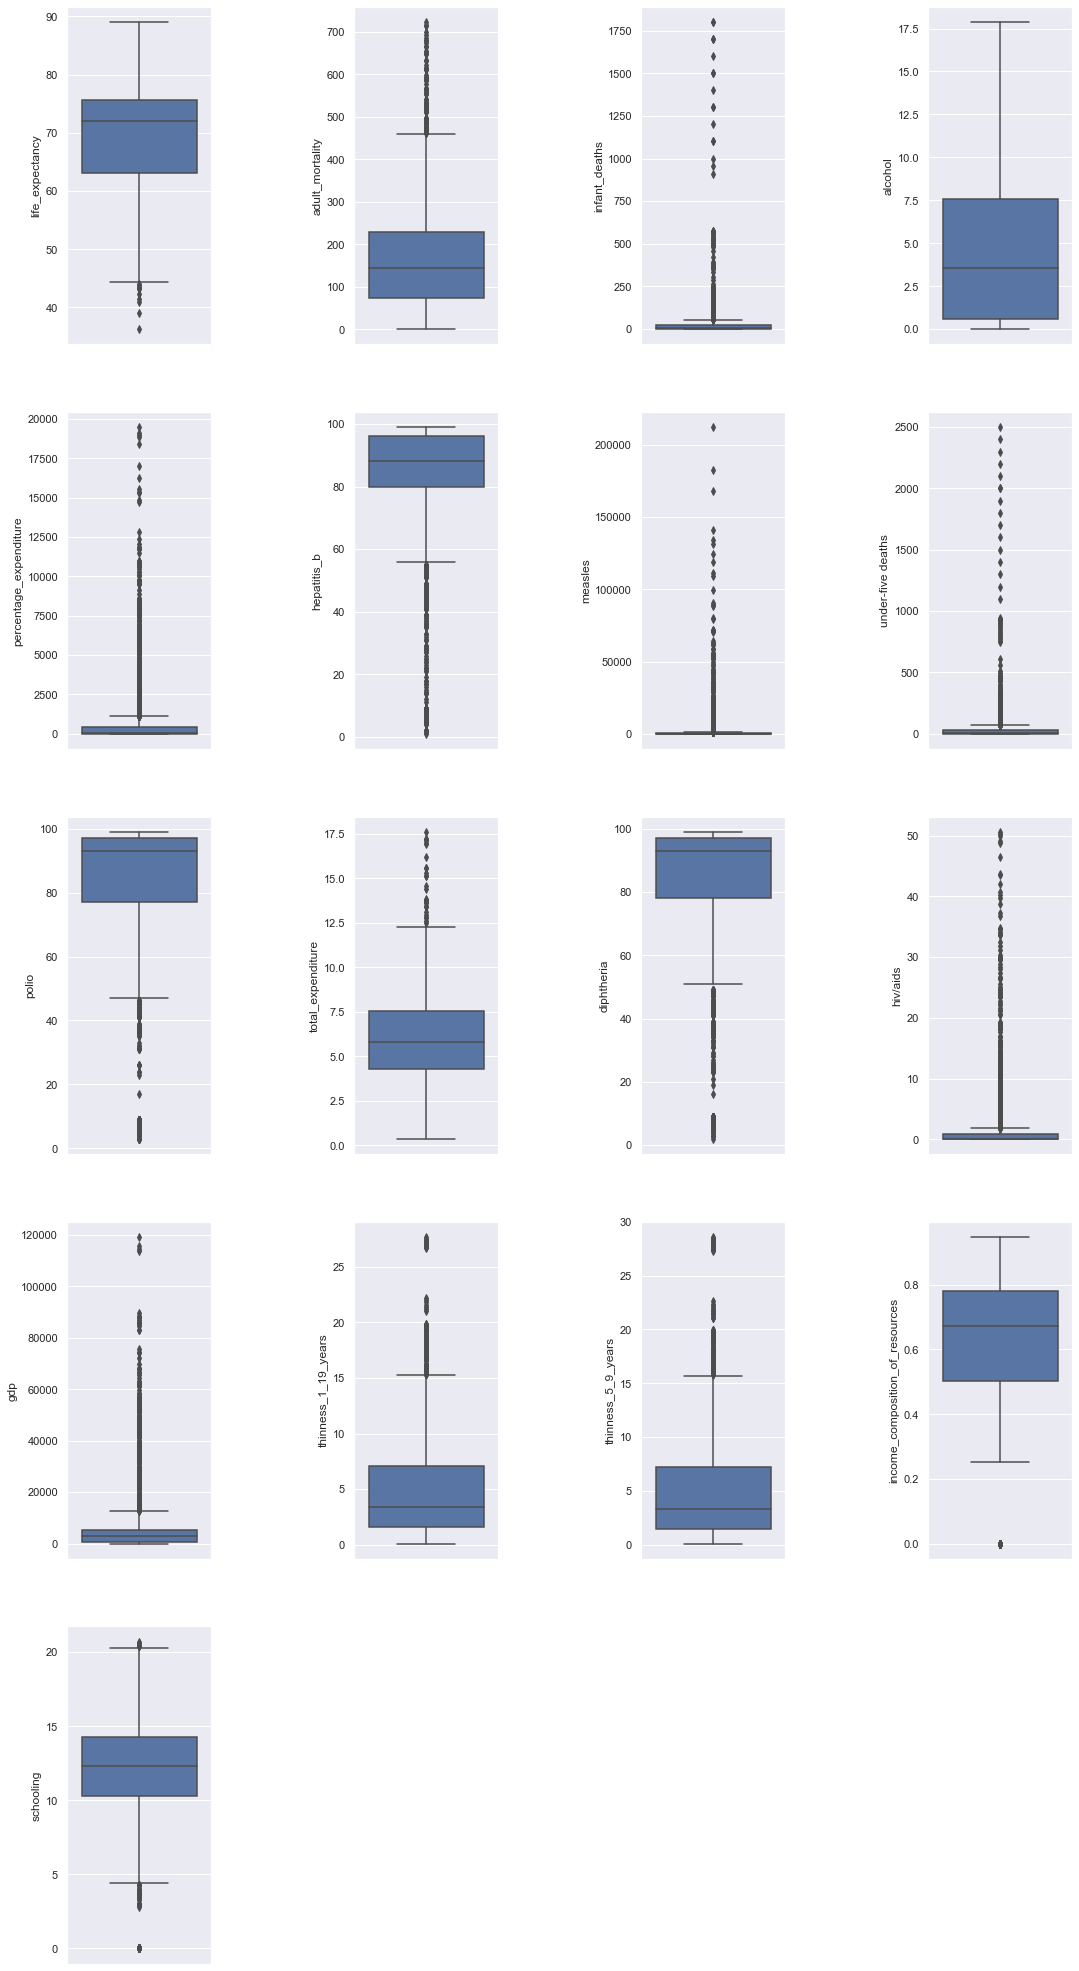

In [74]:
plt.figure(figsize=(18,36))
plt.subplots_adjust(wspace=1, hspace=None)

# taking only numeric cols without the year col
data_numeric = data.select_dtypes(include='number')
column_numeric = data_numeric.columns.drop('year')

i = 1
for col_name in column_numeric:
    plt.subplot(5,4,i)
    sns.boxplot(data=data, y=col_name)
    i +=1

# Comparison EDA <a class="anchor" id="comp_eda"></a>
## Life Expectancy<a class="anchor" id="Life-Expectancy"></a>

First, taking a look on our primary variable:

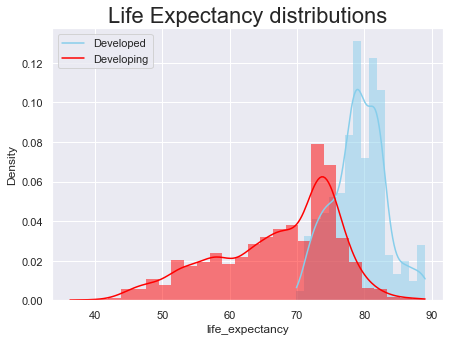

In [81]:
sns.histplot( x=data[data['status']=='Developed']['life_expectancy'], color="skyblue",
              kde=True, stat="density", linewidth=0)
sns.histplot( x=data[data['status']=='Developing']['life_expectancy'], color="red",
              kde=True, stat="density", linewidth=0)
labels=['Developed','Developing']
plt.legend(labels=labels)
plt.title("Life Expectancy distributions", size  =22)
sns.set(rc={'figure.figsize':(15,10)})
plt.show()

In a 'numeric look':

In [76]:
data['life_expectancy'].groupby(data['status']).describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
Developed,512.0,79.197852,3.930942,69.9,76.8,79.25,81.7,89.0
Developing,2416.0,67.111465,9.006092,36.3,61.1,69.00,74.0,89.0


So the cutt-off between developing and developed countries is 69 year.
We can examine the **change over time** in the life expectancy :

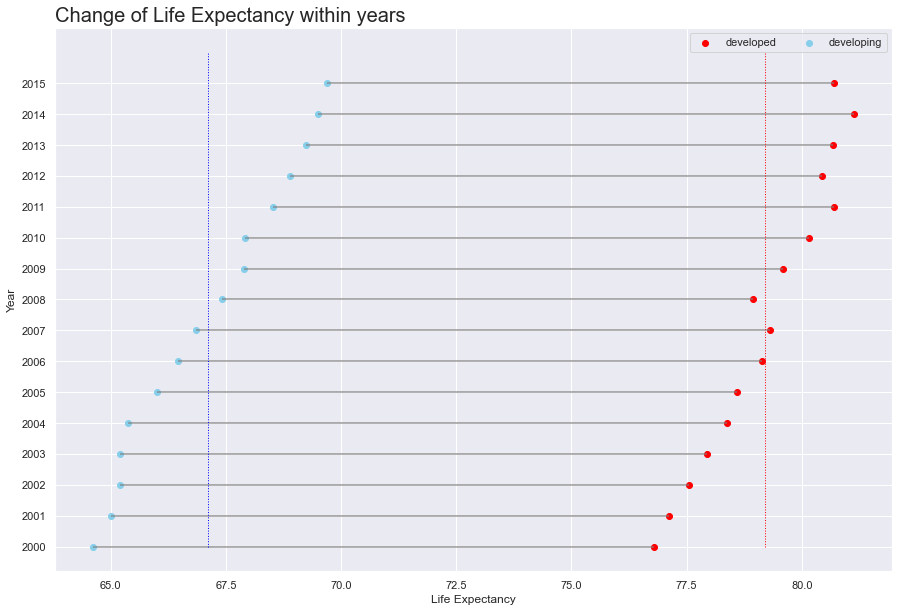

<Figure size 1080x720 with 0 Axes>

In [82]:
import matplotlib.lines as mlines

# Creating data frame with the relevant data
change_in_years = pd.DataFrame(columns=['year','developed','developing'])
years = range(2000,2016)
for year in years:
    temp = data[data['year']==year]
    developed_mean  = temp[temp['status']=='Developed'].mean(skipna=True, numeric_only=True).life_expectancy
    developing_mean = temp[temp['status']=='Developing'].mean(skipna=True, numeric_only=True).life_expectancy
    change_in_years.loc[len(change_in_years.index)] = [year,developed_mean,developing_mean]


# The horizontal plot is made using the hline function
plt.hlines(y=years, xmin=change_in_years['developed'], xmax=change_in_years['developing'], color='grey', alpha=0.8)
plt.scatter(change_in_years['developed'], years, color='red', alpha=1, label='developed')
plt.scatter(change_in_years['developing'], years, color='skyblue', alpha=1 , label='developing')
plt.legend(ncol=2)

# Vertical Lines
developed_mean  = change_in_years.mean(skipna=True, numeric_only=True).developed
developing_mean = change_in_years.mean(skipna=True, numeric_only=True).developing
plt.vlines(x=developed_mean, ymin=2000, ymax=2016, colors='red',  alpha=1, linewidth=1, linestyles='dotted')
plt.vlines(x=developing_mean,ymin=2000, ymax=2016, colors='blue', alpha=1, linewidth=1, linestyles='dotted')

# decoration
plt.yticks(years, years)
plt.title("Change of Life Expectancy within years", loc='left',size =20)
plt.xlabel('Life Expectancy')
plt.ylabel('Year')
plt.figure(figsize=(15,10))

plt.show()




Overall, it seems that developed countries not only has higher life expectancy - they have (relatively) lower variance over the years.


### Communicable, maternal, perinatal and nutritional conditions<a class="anchor" id="CMPN-conditions"></a>

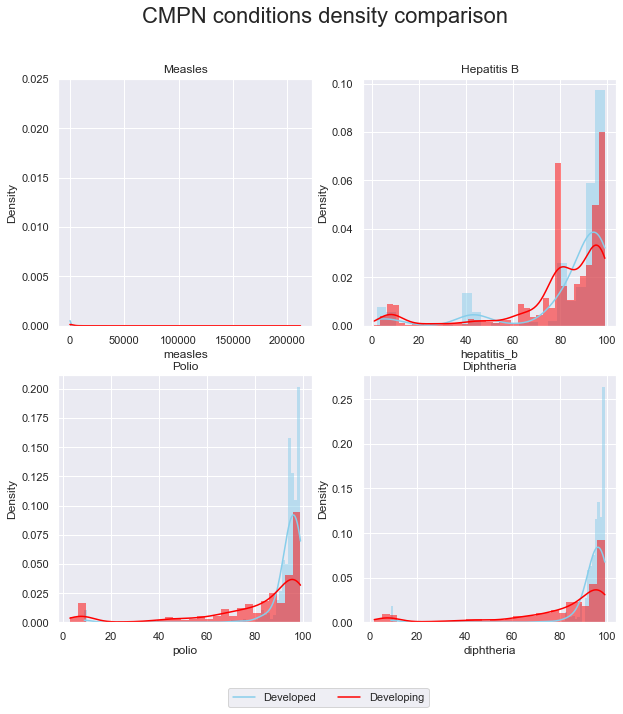

In [78]:
figure, axes = plt.subplots(2, 2, figsize=(10,10))
figure.suptitle('CMPN conditions density comparison ', size = 22)
labels=['Developed','Developing']

axes[0,0].set_title('Measles')
sns.histplot(ax=axes[0, 0], x=data[data['status']=='Developed']['measles'], color="skyblue",
              kde=True, stat="density", linewidth=0)
sns.histplot(ax=axes[0, 0], x=data[data['status']=='Developing']['measles'], color="red",
              kde=True, stat="density", linewidth=0)

axes[0,1].set_title('Hepatitis B')
sns.histplot( ax=axes[0, 1], x=data[data['status']=='Developed']['hepatitis_b'], color="skyblue",
              kde=True, stat="density", linewidth=0)
sns.histplot( ax=axes[0, 1], x=data[data['status']=='Developing']['hepatitis_b'], color="red",
              kde=True, stat="density", linewidth=0)

axes[1,0].set_title('Polio')
sns.histplot( ax=axes[1,0], x=data[data['status']=='Developed']['polio'], color="skyblue",
              kde=True, stat="density", linewidth=0)
sns.histplot( ax=axes[1,0], x=data[data['status']=='Developing']['polio'], color="red",
              kde=True, stat="density", linewidth=0)

axes[1,1].set_title('Diphtheria')
sns.histplot( ax=axes[1, 1], x=data[data['status']=='Developed']['diphtheria'], color="skyblue",
              kde=True, stat="density", linewidth=0)
sns.histplot( ax=axes[1, 1], x=data[data['status']=='Developing']['diphtheria'], color="red",
              kde=True, stat="density", linewidth=0)

figure.legend( labels=labels, loc="lower center",ncol=2, bbox_to_anchor=(0.5,0))
plt.show()


### Social conditions<a class="anchor" id="social-conditions"></a>

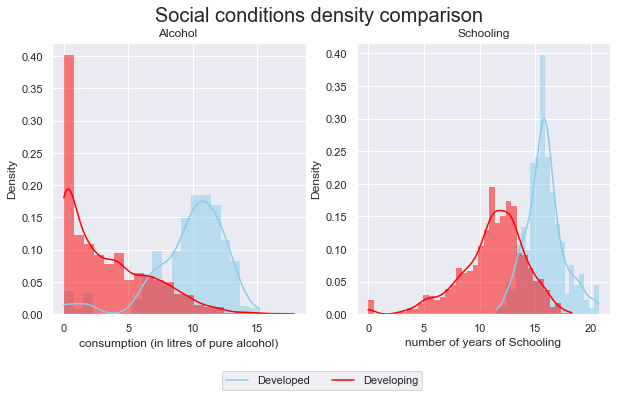

In [79]:
figure, axes = plt.subplots(1, 2 , figsize=(10,5))
figure.suptitle('Social conditions density comparison ', size = 20)
labels=['Developed','Developing']

axes[0].set_title('Alcohol ')
sns.histplot(ax=axes[0], x=data[data['status']=='Developed']['alcohol'], color="skyblue",
              kde=True, stat="density", linewidth=0)
sns.histplot(ax=axes[0], x=data[data['status']=='Developing']['alcohol'], color="red",
              kde=True, stat="density", linewidth=0)
axes[0].set_xlabel( "consumption (in litres of pure alcohol)")

axes[1].set_title('Schooling')
sns.histplot( ax=axes[1], x=data[data['status']=='Developed']['schooling'], color="skyblue",
              kde=True, stat="density", linewidth=0)
sns.histplot( ax=axes[1], x=data[data['status']=='Developing']['schooling'], color="red",
              kde=True, stat="density", linewidth=0)
axes[1].set_xlabel( "number of years of Schooling")

figure.legend( labels=labels, loc="lower center",ncol=2, bbox_to_anchor=(0.5,-.1))
plt.show()


Not surprisingly, schooling is higher in developing  countries.But, alcohol consumption is also higher at developing countries.
Possible explanation is that there is a trend towards decreasing consumption in most developed countries and a steady rise in recorded alcohol consumption in most developing countries. <a href="chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://iogt.org/wp-content/uploads/2015/03/Alcohol-Problems-in-Developing-Countries-Challenges-for-the-New-Millennium.pdf">For more reading</a>.


# Correlation<a class="anchor" id="correlation "></a>

We would like to examine the correlation between the different variables in order to better understand

<AxesSubplot:>

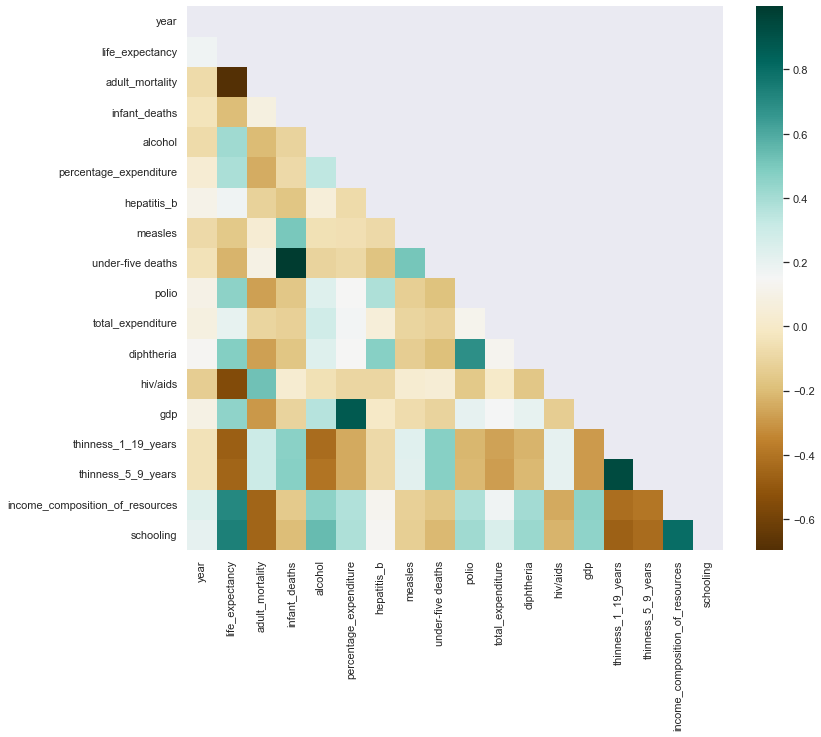

In [80]:
corr_matrix=data.corr()
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr_matrix)
plt.figure(1, figsize=(12,10))
# using the upper triangle matrix as mask
sns.heatmap(corr_matrix, mask=matrix, cmap='BrBG')

4 pairs of features have high correlation
- Infant_Deaths and Under_Five_Deaths
- Percentage_Expenditure and GDP
- Thinness_10_19 years and thinness_5_9 years
- Income_composition_of_resources and Schooling